In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [36]:
def generate_metric_charts(csv_file):
    df = pd.read_csv(csv_file)
    all_data = []
    key = "PACKAGE_ENERGY (W)"

    if "CPU_ENERGY (J)" in df.columns:
            key = "CPU_ENERGY (J)"
    if "PACKAGE_ENERGY (J)" in df.columns:
        key = "PACKAGE_ENERGY (J)"
    if "SYSTEM_POWER (Watts)" in df.columns:
        key = "SYSTEM_POWER (Watts)"
    data = df[key].copy().to_list()

    if key != "CPU_POWER (Watts)" and key != "SYSTEM_POWER (Watts)":
        df[key + "_original"] = df[key].copy()
        for i in range(0, len(data)):
            if i in df[key + "_original"] and i - 1 in df[key + "_original"]:
                # diff with previous value and convert to watts
                data[i] = (data[i] - df[key + "_original"][i - 1]) * (1000 / df["Delta"][i])
            else:
                data[i] = 0

    for i in range(0, len(data)):
        all_data.append({"Time": i, "CPU_POWER (Watts)": data[i]})

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(data, label="CPU Power (Flask)")
    ax.set_ylabel('watts')

    ax2 = ax.twinx()
    ax2.plot(df["USED_MEMORY"]*100/df["TOTAL_MEMORY"], label="Used Memory (%) (Flask)", color="green")
    ax2.set_ylim([0, 100])

    fig.legend(loc='upper right')
    fig.tight_layout()
    plt.show()

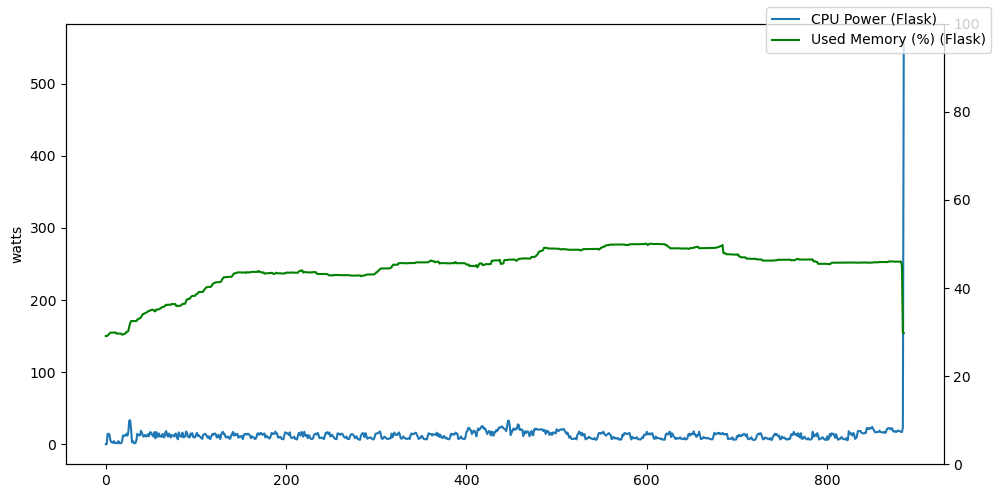

In [ ]:
generate_metric_charts(os.path.join(os.getcwd(), 'results/results_flask.csv'))

/tmp/ipykernel_28999/1556015659.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  data[i] = (data[i] - df[key + "_original"][i - 1]) * (1000 / df["Delta"][i])


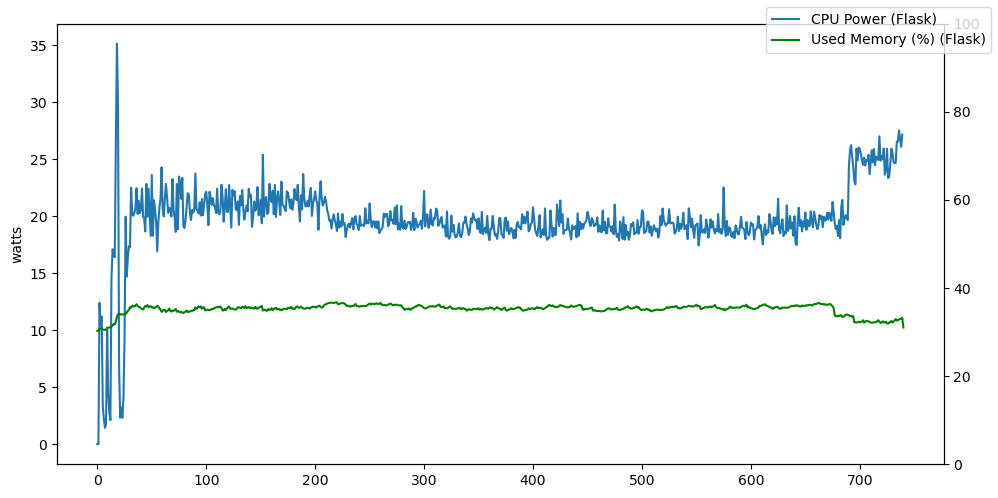

In [ ]:
generate_metric_charts(os.path.join(os.getcwd(), 'results/results_express.csv'))